- https://facebook.github.io/prophet/docs/quick_start.html#python-api
- http://datalove.hatenadiary.jp/entry/python/prophet/getting-started-with-facebook-machine-learning-library-for-time-series-analysis
- https://www.slideshare.net/hoxo_m/prophet-facebook-76285278
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
from numpy.random import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import math
import pickle
import time
import datetime
import json
import itertools
import collections
import os

In [2]:
df_market_spread=pd.read_csv("View of Market Spread_2017.csv")
df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date
df_market_spread.head()

,bitFlyer,Quoine,BtcBox,Zaif,coincheck,Spread pair,Max spread,Date
Date,,,,,,,,
2016-12-15 01:56:00,90474,90663.00000,90454.0,90445,90799,coincheck - Zaif,354.0,2016-12-15 01:56:00
2016-12-15 02:01:00,90508,90659.84543,90542.0,90500,90849,coincheck - Zaif,349.0,2016-12-15 02:01:00
2016-12-15 02:06:00,90637,90799.58457,90657.0,90620,90950,coincheck - Zaif,330.0,2016-12-15 02:06:00
2016-12-15 02:11:00,90620,90771.10274,90877.0,90650,90943,coincheck - bitFlyer,323.0,2016-12-15 02:11:00
2016-12-15 02:16:00,90626,90808.00000,90793.0,90630,90894,coincheck - bitFlyer,268.0,2016-12-15 02:16:00


In [3]:
df_market_spread["spread_quoine_coincheck"] = df_market_spread["Quoine"] - df_market_spread["coincheck"] 

In [18]:
df_market_spread_2017=df_market_spread[(df_market_spread['Date']>"2017-10-01") & (df_market_spread['Date']<"2017-12-31")]

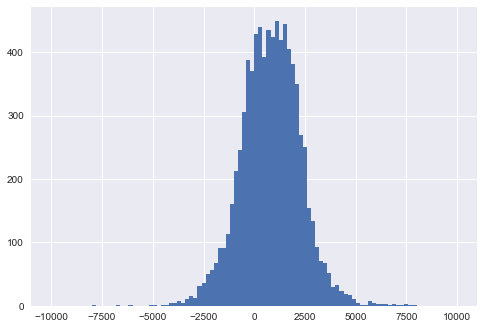

In [19]:
df_market_spread_2017["spread_quoine_coincheck"].hist(bins=100, range=(-10000, 10000))

In [20]:
df=pd.DataFrame()
df[["ds","y"]]=df_market_spread_2017[["Date","spread_quoine_coincheck"]]
df=df[(df['y']>-10000) & (df['y']<10000)]

In [21]:
df.head()

,ds,y
Date,,
2017-10-01 00:06:00,2017-10-01 00:06:00,-170.0
2017-10-01 00:16:00,2017-10-01 00:16:00,49.0
2017-10-01 00:21:00,2017-10-01 00:21:00,36.0
2017-10-01 00:26:00,2017-10-01 00:26:00,164.0
2017-10-01 00:31:00,2017-10-01 00:31:00,-300.0


In [22]:
df.tail()

,ds,y
Date,,
2017-10-29 13:31:00,2017-10-29 13:31:00,1908.0
2017-10-29 13:41:00,2017-10-29 13:41:00,1740.0
2017-10-29 13:46:00,2017-10-29 13:46:00,1948.0
2017-10-29 13:51:00,2017-10-29 13:51:00,1583.0
2017-10-29 13:56:00,2017-10-29 13:56:00,2077.0


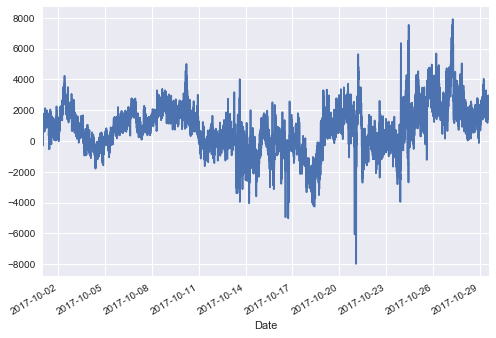

In [23]:
df["y"].plot()

In [24]:
m = Prophet()
m.fit(df)

In [25]:
# periodは予測期間
future = m.make_future_dataframe(periods=1)
future.tail()

,ds
8116,2017-10-29 13:41:00
8117,2017-10-29 13:46:00
8118,2017-10-29 13:51:00
8119,2017-10-29 13:56:00
8120,2017-10-30 13:56:00


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8116,2017-10-29 13:41:00,1913.773752,701.317176,3086.003097
8117,2017-10-29 13:46:00,1916.315088,639.405144,3109.883641
8118,2017-10-29 13:51:00,1918.833451,696.280101,3160.551371
8119,2017-10-29 13:56:00,1921.317275,724.999632,3117.841372
8120,2017-10-30 13:56:00,2819.235025,1582.359750,4085.469682


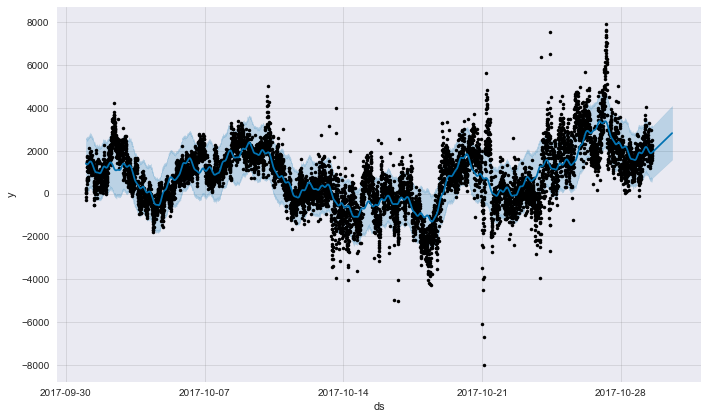

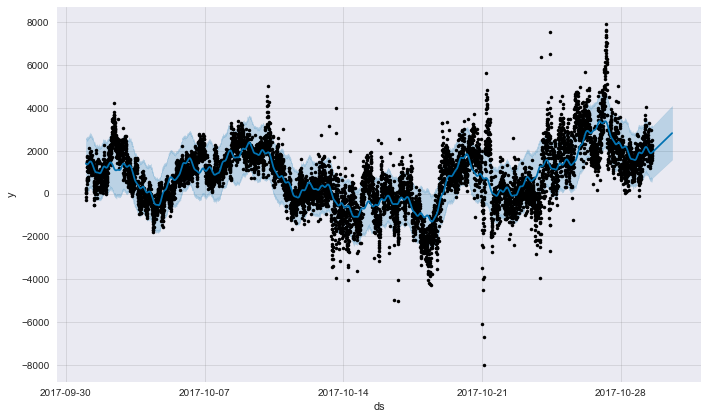

In [27]:
m.plot(forecast)

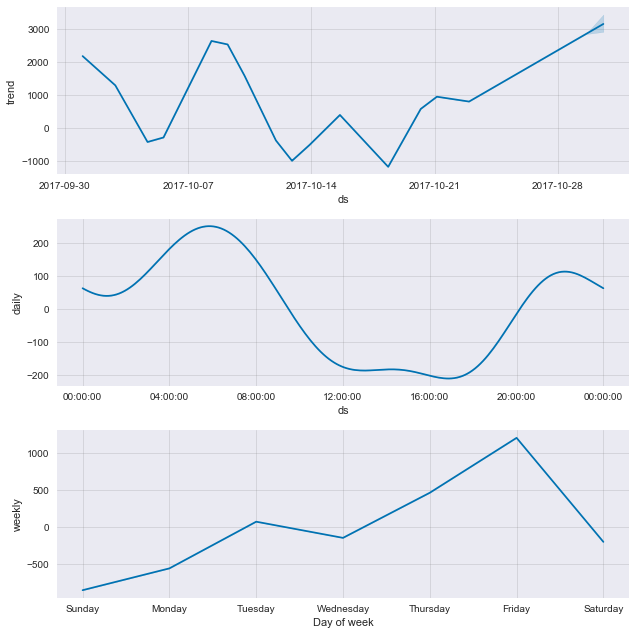

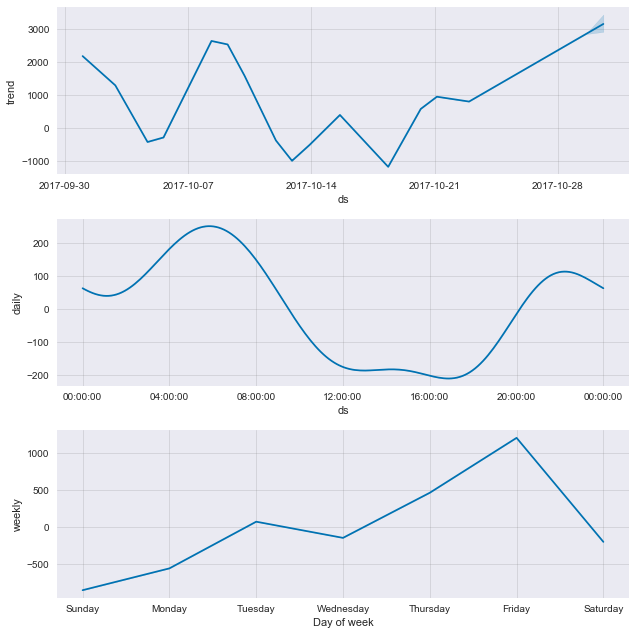

In [28]:
m.plot_components(forecast)

,ds,y
Date,,
2017-01-01 00:01:00,2017-01-01 00:01:00,-3392.0000
2017-01-01 00:06:00,2017-01-01 00:06:00,-3613.0000
2017-01-01 00:11:00,2017-01-01 00:11:00,-3361.0287
2017-01-01 00:16:00,2017-01-01 00:16:00,-3578.0000
2017-01-01 00:21:00,2017-01-01 00:21:00,-3314.0000
